<table align="center">
  <td>
    <a href="https://colab.research.google.com/github/nghiencuuthuoc/PharmApp/PharmApp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
  <td>
    <a target="_blank" href="https://kaggle.com/kernels/welcome?src=https://github.com/nghiencuuthuoc/PharmApp/blob/master/PharmApp.ipynb"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" /></a>
  </td>
</table>


![](./images/PharmApp-logo.png)
# PharmApp - Drug Discovery and Development
Copyright 2024 | Nghiên Cứu Thuốc | RD_Pharma_Plus

Email: nghiencuuthuoc@gmail.com | Web: nghiencuuthuoc.com | FB: facebook.com/nghiencuuthuoc | YouTube: youtube.com/@nghiencuuthuoc 

LinkedIn: linkedin.com/in/nghiencuuthuoc | Zalo: +84888999311 | WhatsApp: +84888999311 | Twitter: x.com/nghiencuuthuoc 

# Pharmacokinetics

## Probabilistic-Pharmacokinetics
https://github.com/NeilMitra/Probabilistic-Pharmacokinetics

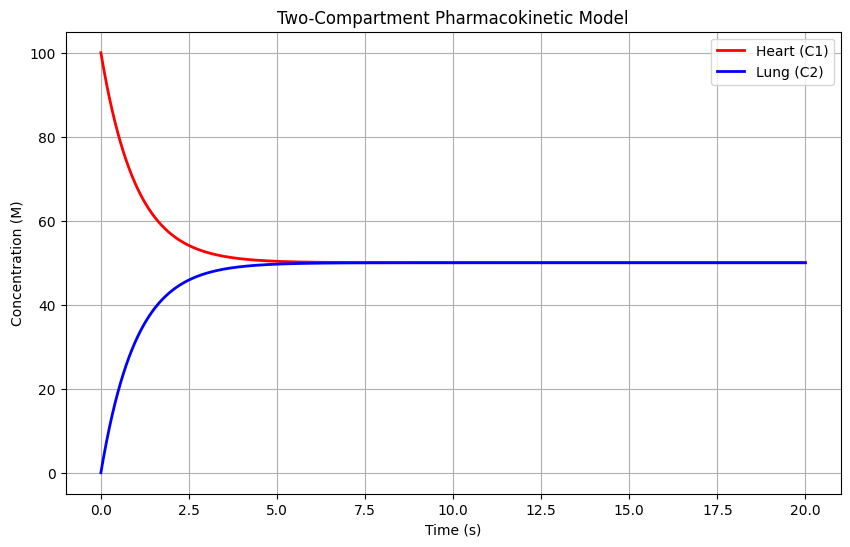

Maximum concentration in Heart: 100.00
Maximum concentration in Lung: 50.00


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

def pk_model(state, t, k1, k2, V1, V2):
    """
    Two-compartment pharmacokinetic model differential equations
    
    Args:
        state: List containing [C1, C2]
        t: Time point
        k1, k2: Transfer rate constants
        V1, V2: Volumes of compartments
    Returns:
        List of derivatives [dC1/dt, dC2/dt]
    """
    C1, C2 = state
    
    # Differential equations from the model
    dC1_dt = (k1 * C2 * V2 - k2 * C1 * V1) / V1
    dC2_dt = (k2 * C1 * V1 - k1 * C2 * V2) / V2
    
    return [dC1_dt, dC2_dt]

def simulate_pk_model(D, V1, V2, k1, k2, t_max, num_points=1000):
    """
    Simulate the two-compartment model
    
    Args:
        D: Initial drug dose
        V1, V2: Volumes of compartments
        k1, k2: Transfer rate constants
        t_max: Maximum simulation time
        num_points: Number of time points to simulate
    """
    # Initial conditions
    C0 = D / V1  # Initial concentration in compartment 1
    initial_state = [C0, 0]  # [C1(0), C2(0)]
    
    # Time points
    t = np.linspace(0, t_max, num_points)
    
    # Solve ODE system
    solution = odeint(pk_model, initial_state, t, args=(k1, k2, V1, V2))
    
    # Plot results
    plt.figure(figsize=(10, 6))
    plt.plot(t, solution[:, 0], 'r-', label='Heart (C1)', linewidth=2)
    plt.plot(t, solution[:, 1], 'b-', label='Lung (C2)', linewidth=2)
    plt.xlabel('Time (s)')
    plt.ylabel('Concentration (M)')
    plt.title('Two-Compartment Pharmacokinetic Model')
    plt.grid(True)
    plt.legend()
    plt.show()
    
    return t, solution

# Example usage
if __name__ == "__main__":
    # Model parameters
    D = 100  # Initial drug dose
    V1 = 1.0  # Volume of compartment 1 (Heart)
    V2 = 1.0  # Volume of compartment 2 (Lung)
    k1 = 0.5  # Transfer rate constant from lung to heart
    k2 = 0.5  # Transfer rate constant from heart to lung
    t_max = 20  # Maximum simulation time
    
    # Run simulation
    t, solution = simulate_pk_model(D, V1, V2, k1, k2, t_max)
    
    # Print some key results
    print(f"Maximum concentration in Heart: {max(solution[:, 0]):.2f}")
    print(f"Maximum concentration in Lung: {max(solution[:, 1]):.2f}")

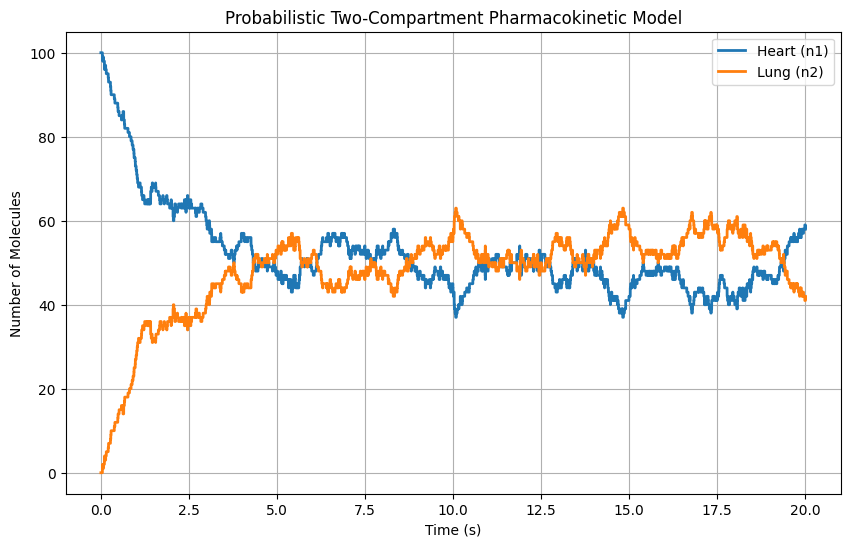

Final molecule count in Heart: 58
Final molecule count in Lung: 42


In [2]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_stochastic_pk_model(D, k1, k2, t_max):
    """
    Simulate the two-compartment pharmacokinetic model using the Gillespie SSA.

    Args:
        D: Initial drug dose (number of molecules)
        k1, k2: Transfer rate constants
        t_max: Maximum simulation time
    Returns:
        times: Array of time points
        n1_values: Array of molecule counts in compartment 1 (Heart)
        n2_values: Array of molecule counts in compartment 2 (Lung)
    """
    # Initialize variables
    n1 = D  # Initial number of molecules in compartment 1 (Heart)
    n2 = 0  # Initial number of molecules in compartment 2 (Lung)
    t = 0.0

    times = [t]
    n1_values = [n1]
    n2_values = [n2]

    # Main simulation loop
    while t < t_max:
        # Calculate propensities
        a1 = k2 * n1  # Propensity of Heart to Lung transfer
        a2 = k1 * n2  # Propensity of Lung to Heart transfer
        a0 = a1 + a2  # Total propensity

        if a0 == 0:
            break  # No more reactions can occur

        # Generate random numbers
        r1 = np.random.random()
        r2 = np.random.random()

        # Time to next reaction
        dt = -np.log(r1) / a0
        t += dt

        # Determine which reaction occurs
        if r2 * a0 < a1:
            # Reaction 1 occurs: Heart to Lung
            n1 -= 1
            n2 += 1
        else:
            # Reaction 2 occurs: Lung to Heart
            n1 += 1
            n2 -= 1

        # Ensure molecule counts are non-negative
        n1 = max(n1, 0)
        n2 = max(n2, 0)

        # Record time and molecule counts
        times.append(t)
        n1_values.append(n1)
        n2_values.append(n2)

    return np.array(times), np.array(n1_values), np.array(n2_values)

def plot_stochastic_results(times, n1_values, n2_values):
    """
    Plot the results of the stochastic simulation.

    Args:
        times: Array of time points
        n1_values: Array of molecule counts in compartment 1 (Heart)
        n2_values: Array of molecule counts in compartment 2 (Lung)
    """
    plt.figure(figsize=(10, 6))
    plt.step(times, n1_values, where='post', label='Heart (n1)', linewidth=2)
    plt.step(times, n2_values, where='post', label='Lung (n2)', linewidth=2)
    plt.xlabel('Time (s)')
    plt.ylabel('Number of Molecules')
    plt.title('Probabilistic Two-Compartment Pharmacokinetic Model')
    plt.grid(True)
    plt.legend()
    plt.show()

# Example usage
if __name__ == "__main__":
    # Model parameters
    D = 100  # Initial drug dose (number of molecules)
    k1 = 0.5  # Transfer rate constant from lung to heart
    k2 = 0.5  # Transfer rate constant from heart to lung
    t_max = 20  # Maximum simulation time

    # Run stochastic simulation
    times, n1_values, n2_values = simulate_stochastic_pk_model(D, k1, k2, t_max)

    # Plot results
    plot_stochastic_results(times, n1_values, n2_values)

    # Print some key results
    print(f"Final molecule count in Heart: {n1_values[-1]}")
    print(f"Final molecule count in Lung: {n2_values[-1]}")

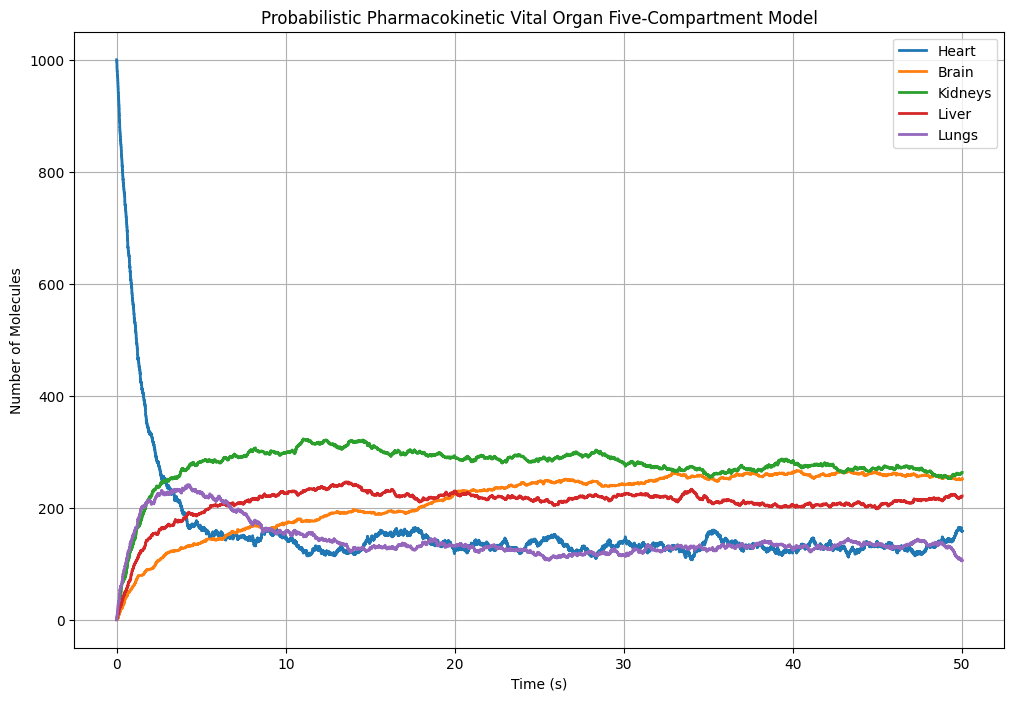

Final molecule counts:
Heart: 158
Brain: 252
Kidneys: 263
Liver: 221
Lungs: 106


In [5]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_stochastic_pk_model(D, rate_constants, t_max):
    # Initialize molecule counts with full compartment names
    n = {
        'Heart': D,     # Heart
        'Brain': 0,     # Brain
        'Kidneys': 0,   # Kidneys
        'Liver': 0,     # Liver
        'Lungs': 0      # Lungs
    }

    t = 0.0
    times = [t]
    n_history = {compartment: [count] for compartment, count in n.items()}

    # Reactions with full compartment names
    reactions = [
        {'from': 'Heart', 'to': 'Brain', 'rate': rate_constants['k_Heart_Brain']},
        {'from': 'Brain', 'to': 'Heart', 'rate': rate_constants['k_Brain_Heart']},
        {'from': 'Heart', 'to': 'Kidneys', 'rate': rate_constants['k_Heart_Kidneys']},
        {'from': 'Kidneys', 'to': 'Heart', 'rate': rate_constants['k_Kidneys_Heart']},
        {'from': 'Heart', 'to': 'Liver', 'rate': rate_constants['k_Heart_Liver']},
        {'from': 'Liver', 'to': 'Heart', 'rate': rate_constants['k_Liver_Heart']},
        {'from': 'Heart', 'to': 'Lungs', 'rate': rate_constants['k_Heart_Lungs']},
        {'from': 'Lungs', 'to': 'Heart', 'rate': rate_constants['k_Lungs_Heart']}
    ]

    # Main simulation loop
    while t < t_max:
        # Calculate propensities
        propensities = []
        for reaction in reactions:
            n_from = n[reaction['from']]
            rate = reaction['rate']
            propensity = rate * n_from
            propensities.append(propensity)

        a0 = sum(propensities)

        if a0 == 0:
            break  # No more reactions can occur

        # Generate random numbers
        r1 = np.random.random()
        r2 = np.random.random()

        # Time to next reaction
        dt = -np.log(r1) / a0
        t += dt

        # Determine which reaction occurs
        cumulative_propensity = 0.0
        threshold = r2 * a0
        for i, reaction in enumerate(reactions):
            cumulative_propensity += propensities[i]
            if cumulative_propensity > threshold:
                # Update molecule counts
                n[reaction['from']] -= 1
                n[reaction['to']] += 1
                break

        # Ensure molecule counts are non-negative
        for compartment in n:
            n[compartment] = max(n[compartment], 0)

        # Record time and molecule counts
        times.append(t)
        for compartment in n:
            n_history[compartment].append(n[compartment])

    return np.array(times), n_history

def plot_stochastic_results(times, n_history):
    plt.figure(figsize=(12, 8))
    for compartment, counts in n_history.items():
        plt.step(times, counts, where='post', label=compartment, linewidth=2)

    plt.xlabel('Time (s)')
    plt.ylabel('Number of Molecules')
    plt.title('Probabilistic Pharmacokinetic Vital Organ Five-Compartment Model')
    plt.grid(True)
    plt.legend()
    plt.show()

# Example usage
if __name__ == "__main__":
    # Initial drug dose
    D = 1000  # Number of drug molecules initially in the heart

    # Rate constants with updated keys
    rate_constants = {
        'k_Heart_Brain': 0.1,    # Heart to Brain
        'k_Brain_Heart': 0.05,   # Brain to Heart
        'k_Heart_Kidneys': 0.2,  # Heart to Kidneys
        'k_Kidneys_Heart': 0.1,  # Kidneys to Heart
        'k_Heart_Liver': 0.15,   # Heart to Liver
        'k_Liver_Heart': 0.1,    # Liver to Heart
        'k_Heart_Lungs': 0.25,   # Heart to Lungs
        'k_Lungs_Heart': 0.25    # Lungs to Heart
    }

    t_max = 50  # Maximum simulation time

    # Run stochastic simulation
    times, n_history = simulate_stochastic_pk_model(D, rate_constants, t_max)

    # Plot results
    plot_stochastic_results(times, n_history)

    # Print final molecule counts
    print("Final molecule counts:")
    for compartment, counts in n_history.items():
        print(f"{compartment}: {counts[-1]}")

# PK - simple pharmacokinetics script in Python

https://github.com/alexrd/pk/blob/master/run_pk.py

## Features
  - can implement an arbitrary sequence of doses
  - can specify absorption, elimination, distribution and binding constants
  - can specify an arbitrary time period of interest

## Output
  - concentrations of all system components as a function of time
    - Unabsorbed concentration
    - Concentration in blood
    - Concentration in tissue
    - Bound concentration
    - Concentration of free protein target

## Usage
`python run_pk.py`

Integration successful.
[[0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [9.84336579e-06 1.10301890e-10 1.06892936e-02]
 [9.73752544e-06 1.21227505e-10 2.12734443e-02]
 ...
 [5.87046356e-05 5.87105237e-04 9.99998297e-01]
 [5.80734366e-05 5.80792630e-04 9.99998278e-01]
 [5.74490674e-05 5.74548322e-04 9.99998259e-01]]


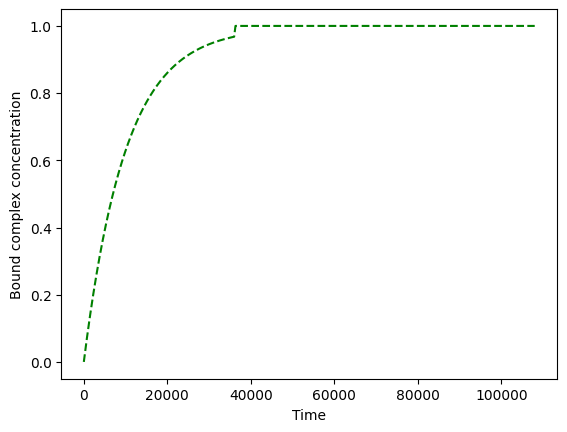

In [3]:
# This script integrates a set of differential equations forward in time using scipy.integrate
#  that together describe the pharmacokinetic properties of a drug as follows:
#
#
#     kabs            k1           kon
#  I  --->   Iblood  ----> Itissue ---->  EI 
#            |       <----         <----
#            | kout   k2           koff
#           \/
#
#
#   where kout is the sum of the rates of elimination and metabolism.
# All rates are in units of 1/s, except for kon, which is in 1/(M s).
# Concentrations are in mol/L, and time is in seconds.
#
# All species are described in the system vector X:
#   X = [Iblood, Itissue, f]
#
# All rates are described in the rate vector R:
#   R = [kabs, kout, k1, k2, kon, koff]
#
#   where [E] = (1-f)Etot and [EI] = f*Etot
#     and Etot is the total concentration of target protein
#
# Alex Dickson
# Michigan State University, 2016
#

import numpy as np
import pylab as p
import matplotlib.pyplot as plt
from scipy import integrate

# set time parameters of interest
tmin = 0      # first time point of interest
tmax = 108000  # last time point of interest
tres = 1000    # time resolution of output

# set dose profile
dose_conc = [1,1,1] # in M
dose_time = [-0.001,36000,72000] # in s

I0 = 1  # initial concentration of unabsorbed compound
Etot = 1  # total concentration of protein 
X0 = np.array([0,0,0])
R = np.array([0.0001,0.05,10,1,1E6,0.001])

# functions

def I_of_t (t):
    isum = 0
    for dt, conc in zip(dose_time, dose_conc):
        isum += step(t-dt)*conc*np.exp(-R[0]*(t-dt))
    return isum

def step(x):
    return 1 * (x > 0)

def dIblood_dt (X,t):
    dIb_dt = R[0]*I_of_t(t) - X[0]*(R[1] + R[2]) + X[1]*R[3]
    return dIb_dt

def dItissue_dt (X,t):
    dIt_dt = R[2]*X[0] - X[1]*(R[3] + (1.-X[2])*Etot*R[4]) + X[2]*R[5]*Etot
    return dIt_dt

def df_dt (X,t):
    df_dt = X[1]*R[4] - X[2]*(X[1]*R[4] + R[5])
    return df_dt

def dX_dt(X,t):
    return np.array([dIblood_dt(X,t), dItissue_dt(X,t), df_dt(X,t)])

t = np.linspace(tmin,tmax,tres)
plt.plot(t,I_of_t(t))
plt.xlabel("Time")
plt.ylabel("Unabsorbed drug concentration")
p.savefig('I_of_t.png', bbox_inches='tight')

X, infodict = integrate.odeint(dX_dt,X0,t,full_output=True);
print(infodict['message'])
print(X)

plt.figure(1)
plt.clf()
plt.plot(t,X.T[0],'r')
plt.xlabel("Time")
plt.ylabel("I_blood")
p.savefig('Iblood.png', bbox_inches='tight')

plt.clf()
plt.plot(t,X.T[1],'b')
plt.xlabel("Time")
plt.ylabel("I_tissue")
p.savefig('Itissue.png', bbox_inches='tight')

plt.clf()
plt.plot(t,X.T[2],'g')
plt.xlabel("Time")
plt.ylabel("Fraction of complex bound")
p.savefig('frac_bound.png', bbox_inches='tight')

plt.clf()
EI = Etot*X.T[2]  # get EI concentration as a function of time
E = Etot*(1.-X.T[2])  # get free E concentration as a function of time
plt.plot(t,EI,'g--')
plt.xlabel("Time")
plt.ylabel("Bound complex concentration")
p.savefig('bound.png', bbox_inches='tight')